In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [122]:
df = pd.read_csv('./tendulkar_ODI.csv')

In [123]:
df.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


In [124]:
df.Runs.value_counts()

1       16
2       14
0       12
4        9
21       8
        ..
50       1
117*     1
122      1
85       1
57       1
Name: Runs, Length: 118, dtype: int64

In [125]:
df.Runs.unique()

array(['0', '36', '19', '31', '53', '30', 'DNB', '4', '62', '1', '57',
       '21', '69', '11', '84', '39', '15', '10', '22', '32', '23', '82*',
       '3', '24', '5', '34', '8*', '25', '26*', '2', '28*', '11*', '52',
       '82', '63', '40', '6', '8', '115', '66', '54', '88', '105', '13',
       '7', '65', '127*', '70', '90', '137', '110', '64', '28', '67',
       '114', '14', '45', '44', '65*', '9', '117', '27', '100', '33',
       '18', '100*', '17', '128', '29', '37', '120', '186*', '12', '26',
       '122', '93', '146', '35', '139', '70*', '101', '38', '68', '87*',
       '34*', '81', '89', '102', '86', '141', '74', '16', '47', '123',
       '67*', '42', '95', '55', '60', 'TDNB', '99', '71', '94', '43',
       '79', '72', '97', '117*', '91', '50', '20', '163*', '138', '175',
       '96*', '200*', '111', '85'], dtype=object)

In [126]:
df.Runs.isin(['DNB','TDNB']).value_counts()

False    292
True       3
Name: Runs, dtype: int64

In [127]:
df.loc[df.Runs.isin(['DNB','TDNB'])]

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
8,9,DNB,-,-,-,-,-,-,-,2,v Bangladesh,Chandigarh,25-Dec-90
38,39,DNB,-,-,-,-,-,-,-,2,v Zimbabwe,Pune,25-Mar-93
233,234,TDNB,-,-,-,-,-,-,-,-,v Sri Lanka,Kolkata,8-Feb-07


In [128]:
df = df.loc[~df.Runs.isin(['DNB','TDNB'])]

In [129]:
df.Runs.unique()

array(['0', '36', '19', '31', '53', '30', '4', '62', '1', '57', '21',
       '69', '11', '84', '39', '15', '10', '22', '32', '23', '82*', '3',
       '24', '5', '34', '8*', '25', '26*', '2', '28*', '11*', '52', '82',
       '63', '40', '6', '8', '115', '66', '54', '88', '105', '13', '7',
       '65', '127*', '70', '90', '137', '110', '64', '28', '67', '114',
       '14', '45', '44', '65*', '9', '117', '27', '100', '33', '18',
       '100*', '17', '128', '29', '37', '120', '186*', '12', '26', '122',
       '93', '146', '35', '139', '70*', '101', '38', '68', '87*', '34*',
       '81', '89', '102', '86', '141', '74', '16', '47', '123', '67*',
       '42', '95', '55', '60', '99', '71', '94', '43', '79', '72', '97',
       '117*', '91', '50', '20', '163*', '138', '175', '96*', '200*',
       '111', '85'], dtype=object)

In [130]:
df.Runs = df.Runs.apply(lambda x: x.replace('*',''))
df.Runs = df.Runs.astype('int32')

In [131]:
df.Runs.describe()

count    292.000000
mean      39.448630
std       39.933374
min        0.000000
25%        7.000000
50%       27.500000
75%       62.250000
max      200.000000
Name: Runs, dtype: float64

In [137]:
df.Runs.value_counts()

1     16
2     14
0     12
4      9
21     8
      ..
87     1
89     1
90     1
91     1
60     1
Name: Runs, Length: 105, dtype: int64

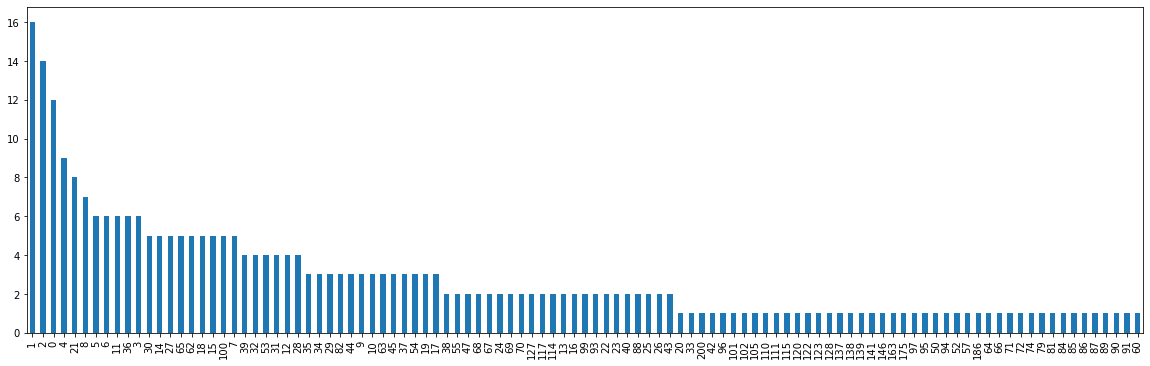

In [146]:
plt.figure(figsize=[20,6])
df.Runs.value_counts().plot.bar()
plt.show()

In [150]:
df['4s'].unique()

array(['0', '5', '1', '3', '7', '2', '8', '6', '4', '15', '9', '13', '10',
       '14', '11', '20', '12', '19', '17', '16', '25'], dtype=object)

In [151]:
df['4s'].astype('int32')

0       0
1       0
2       5
3       1
4       3
       ..
290     2
291     0
292     0
293     2
294    12
Name: 4s, Length: 292, dtype: int32

In [154]:
df['4s'].value_counts()

0     69
1     37
2     29
3     25
4     17
5     16
9     15
6     14
8     13
7     13
10    11
13     8
12     5
11     4
16     4
15     4
14     3
19     2
20     1
17     1
25     1
Name: 4s, dtype: int64

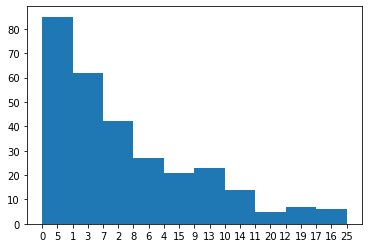

In [153]:
plt.hist(df['4s'])
plt.show()

<AxesSubplot:>

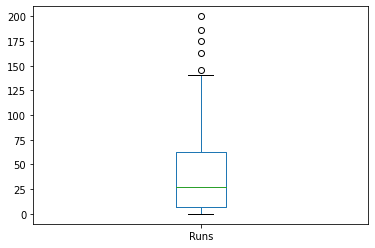

In [155]:
df.Runs.plot.box()

In [172]:
df2 = pd.read_csv('./popularity.csv',sep=r'\s*,\s*', engine='python')

In [179]:
df2.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [186]:
df2.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [188]:
df2.shares.mean()

3395.3801836343455

In [189]:
df2.shares.median()

1400.0

In [194]:
df2.shares.value_counts()

1100      2308
1200      2018
1300      1740
1400      1592
1500      1323
          ... 
197600       1
310800       1
92           1
57800        1
82200        1
Name: shares, Length: 1454, dtype: int64

<AxesSubplot:>

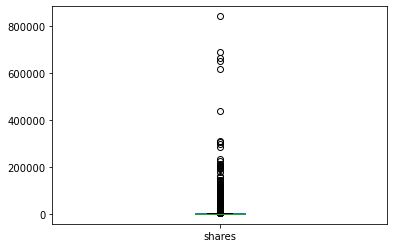

In [195]:
df2.shares.plot.box()

<AxesSubplot:>

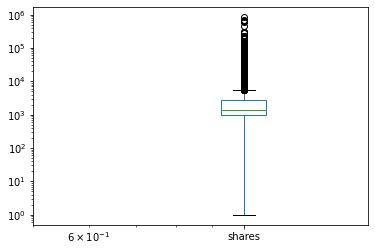

In [196]:
df2.shares.plot.box(logx=True,logy=True)

In [197]:
df2.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [205]:
df2.loc[df2.shares>100000].shares.value_counts()

104100    2
105400    2
210300    1
843300    1
200100    1
102200    1
663600    1
158900    1
115700    1
122800    1
133700    1
208300    1
441000    1
193400    1
141400    1
110200    1
128800    1
284700    1
104600    1
106400    1
128500    1
102500    1
144400    1
306100    1
205600    1
144900    1
119100    1
143100    1
109500    1
161600    1
690400    1
128900    1
109100    1
112500    1
108400    1
233400    1
139500    1
109800    1
180600    1
100300    1
227300    1
211600    1
197600    1
118700    1
196700    1
112600    1
298400    1
310800    1
652900    1
139600    1
138700    1
113700    1
145500    1
111300    1
100200    1
617900    1
Name: shares, dtype: int64

<AxesSubplot:>

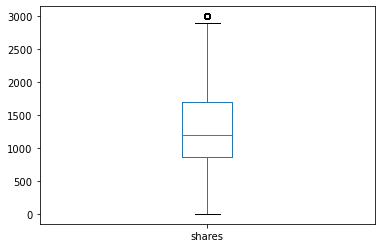

In [221]:
df2.loc[df2.shares<=3000].shares.plot.box()

In [222]:
(df2.loc[df2.shares>3000].shares.size/df2.shares.size)*100

22.515386943799818

<AxesSubplot:ylabel='Frequency'>

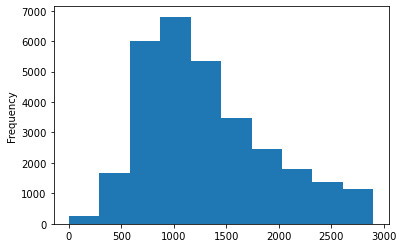

In [228]:
df2.loc[df2.shares<3000].shares.plot.hist()

In [31]:
eda = pd.read_csv('./EDA_census.csv')

In [3]:
eda.head()

,state code,distt. code,area name,t/r/u,age-group,total.persons,total.males,total.females,illiterate.persons,illiterate.males,...,ntdiploma.females,tdiploma.persons,tdiploma.males,tdiploma.females,graduate.persons,graduate.males,graduate.females,unclassified.persons,unclassified.males,unclassified.females
0,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,...,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
1,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,...,0,0,0,0,0,0,0,0,0,0
2,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,...,0,0,0,0,0,0,0,136465,75715,60750
3,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,...,0,0,0,0,0,0,0,96524,52561,43963
4,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,...,0,0,0,0,0,0,0,70452,38456,31996


In [5]:
eda.shape

(3132, 44)

In [12]:
literates = eda.groupby('age-group')['literate.persons']

In [13]:
totals = eda.groupby('age-group')['total.persons']

In [15]:
eda['lvst'] = eda['literate.persons']/eda['total.persons']

In [20]:
eda.shape

(3132, 45)

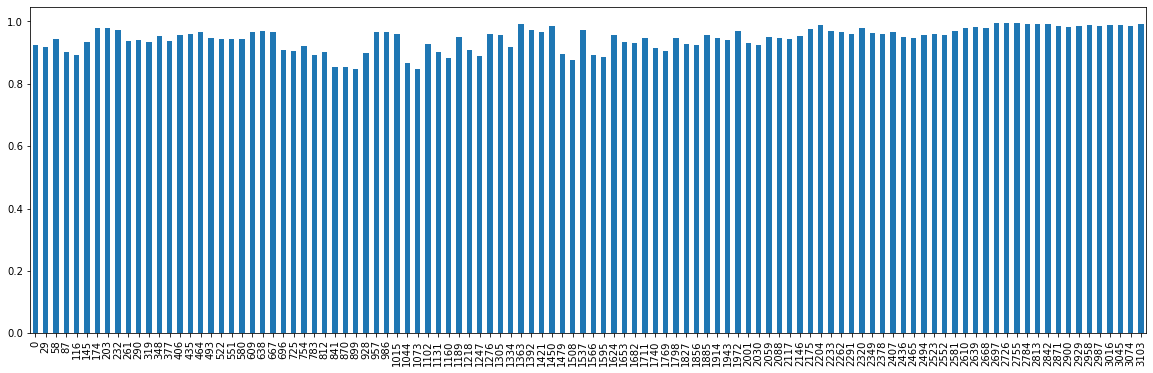

In [31]:
plt.figure(figsize=(20,6))
eda.groupby(['age-group'])['lvst'].plot.bar()
plt.show()

In [32]:
eda.groupby(['age-group']).head()

,state code,distt. code,area name,t/r/u,age-group,total.persons,total.males,total.females,illiterate.persons,illiterate.males,...,tdiploma.persons,tdiploma.males,tdiploma.females,graduate.persons,graduate.males,graduate.females,unclassified.persons,unclassified.males,unclassified.females,lvst
0,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,...,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454,0.630661
1,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,...,0,0,0,0,0,0,0,0,0,0.000000
2,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,...,0,0,0,0,0,0,136465,75715,60750,0.728187
3,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,...,0,0,0,0,0,0,96524,52561,43963,0.846805
4,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,...,0,0,0,0,0,0,70452,38456,31996,0.893620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1,0,State - JAMMU & KASHMIR,Rural,65-69,140720,70780,69940,110045,44806,...,84,79,5,2182,2091,91,547,328,219,0.217986
141,1,0,State - JAMMU & KASHMIR,Rural,70-74,132084,70777,61307,111093,52813,...,43,41,2,1105,1054,51,529,321,208,0.158922
142,1,0,State - JAMMU & KASHMIR,Rural,75-79,58918,29980,28938,49776,22280,...,19,16,3,341,312,29,278,170,108,0.155165
143,1,0,State - JAMMU & KASHMIR,Rural,80+,94242,49712,44530,79064,37929,...,39,28,11,666,498,168,404,236,168,0.161053


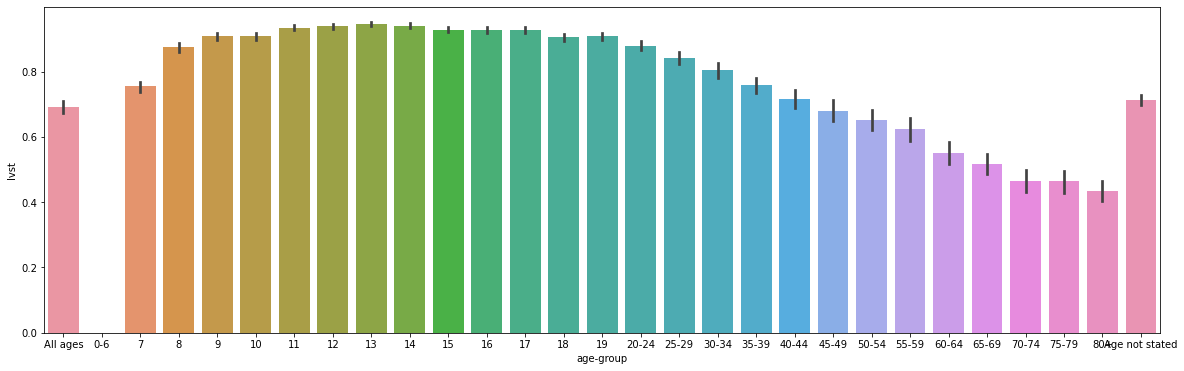

In [35]:
plt.figure(figsize=(20,6))
sns.barplot(data=eda, x='age-group', y='lvst')
plt.show()

In [40]:
eda['flr'] = (eda['literate.females']/eda['literate.persons'])

In [50]:
eda.sort_values(by='flr', ascending=False)

,state code,distt. code,area name,t/r/u,age-group,total.persons,total.males,total.females,illiterate.persons,illiterate.males,...,tdiploma.males,tdiploma.females,graduate.persons,graduate.males,graduate.females,unclassified.persons,unclassified.males,unclassified.females,lvst,flr
2734,31,0,State - LAKSHADWEEP,Rural,13,262,98,164,1,0,...,0,0,0,0,0,0,0,0,0.996183,0.624521
2735,31,0,State - LAKSHADWEEP,Rural,14,240,90,150,2,0,...,0,0,0,0,0,0,0,0,0.991667,0.621849
2737,31,0,State - LAKSHADWEEP,Rural,16,217,81,136,3,0,...,0,0,0,0,0,0,0,0,0.986175,0.621495
2869,32,0,State - KERALA,Urban,80+,243162,88367,154795,68974,13235,...,2070,2709,7499,5378,2121,1011,369,642,0.716345,0.568673
2811,32,0,State - KERALA,Total,80+,541849,204348,337501,165900,36651,...,4180,4601,10710,7809,2901,2213,886,1327,0.693826,0.553937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,34,0,State - PUDUCHERRY,Rural,0-6,44514,22798,21716,44514,22798,...,0,0,0,0,0,0,0,0,0.000000,NaN
3017,34,0,State - PUDUCHERRY,Urban,0-6,88344,44729,43615,88344,44729,...,0,0,0,0,0,0,0,0,0.000000,NaN
3046,35,0,State - ANDAMAN & NICOBAR ISLANDS,Total,0-6,40878,20770,20108,40878,20770,...,0,0,0,0,0,0,0,0,0.000000,NaN
3075,35,0,State - ANDAMAN & NICOBAR ISLANDS,Rural,0-6,26415,13370,13045,26415,13370,...,0,0,0,0,0,0,0,0,0.000000,NaN


In [51]:
eda['tlr'] = eda['literate.persons']/eda['total.persons']

In [53]:
eda.sort_values(by='tlr',ascending=True)

,state code,distt. code,area name,t/r/u,age-group,total.persons,total.males,total.females,illiterate.persons,illiterate.males,...,tdiploma.females,graduate.persons,graduate.males,graduate.females,unclassified.persons,unclassified.males,unclassified.females,lvst,flr,tlr
1074,12,0,State - ARUNACHAL PRADESH,Rural,0-6,172289,87241,85048,172289,87241,...,0,0,0,0,0,0,0,0.000000,NaN,0.000000
871,10,0,State - BIHAR,Total,0-6,19133964,9887239,9246725,19133964,9887239,...,0,0,0,0,0,0,0,0.000000,NaN,0.000000
2031,23,0,State - MADHYA PRADESH,Rural,0-6,8325731,4329993,3995738,8325731,4329993,...,0,0,0,0,0,0,0,0.000000,NaN,0.000000
233,2,0,State - HIMACHAL PRADESH,Urban,0-6,65076,34605,30471,65076,34605,...,0,0,0,0,0,0,0,0.000000,NaN,0.000000
697,8,0,State - RAJASTHAN,Total,0-6,10649504,5639176,5010328,10649504,5639176,...,0,0,0,0,0,0,0,0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854,32,0,State - KERALA,Urban,17,247599,125781,121818,1643,824,...,0,0,0,0,366,194,172,0.993364,0.491954,0.993364
2763,31,0,State - LAKSHADWEEP,Urban,13,888,421,467,4,3,...,0,0,0,0,1,0,1,0.995495,0.527149,0.995495
2705,31,0,State - LAKSHADWEEP,Total,13,1150,519,631,5,3,...,0,0,0,0,1,0,1,0.995652,0.549345,0.995652
2736,31,0,State - LAKSHADWEEP,Rural,15,235,111,124,1,1,...,0,0,0,0,1,1,0,0.995745,0.529915,0.995745


In [6]:
import datetime

In [2]:
gs = pd.read_csv('./EDA_Gold_Silver_prices.csv')

In [3]:
gs.head()

,Month,SilverPrice,GoldPrice
0,Mar-97,186.48,12619.24
1,Apr-97,170.65,12338.59
2,May-97,170.44,12314.94
3,Jun-97,169.96,12202.78
4,Jul-97,155.80,11582.07


In [4]:
gs.shape

(241, 3)

In [5]:
gs.corr()

,SilverPrice,GoldPrice
SilverPrice,1.000000,0.954256
GoldPrice,0.954256,1.000000


In [9]:
gs['Year'] = gs.Month.apply(lambda x: datetime.datetime.strptime(x, '%b-%y').year)

In [11]:
gs['Year'].dtype

dtype('int64')

In [16]:
gs.loc[gs['Year'] == 2008].groupby('Year').corr()

SilverPrice  GoldPrice
Year                                    
2008 SilverPrice     1.000000   0.009584
     GoldPrice       0.009584   1.000000

In [18]:
cur = pd.read_csv('./currencies.csv')

In [19]:
cur.head()

,Currency,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
0,"July 01, 2016",9.29446,1.25367,143.645,1.05054,1.39596,NaN,1.87126,0.524882,NaN,...,20.3528,202.763,11.8246,1.36009,NaN,9.28428,3.06035,5.12668,NaN,13.9247
1,"July 05, 2016",9.31515,1.25322,142.715,1.06143,1.39684,154.063,1.85825,0.525213,15.2162,...,20.6240,202.886,11.7627,1.35689,49.0655,9.26724,NaN,5.12992,42.9026,13.9335
2,"July 06, 2016",9.31697,1.25834,140.540,1.07300,1.39286,154.094,1.87313,0.523717,15.2392,...,20.7232,NaN,11.8805,1.36208,49.0692,9.25643,NaN,5.11527,42.6425,13.8938
3,"July 07, 2016",9.31315,1.25737,140.640,1.06911,1.39316,153.957,1.85236,0.523829,15.1430,...,20.4288,202.351,11.9192,1.36098,49.0295,NaN,NaN,5.11637,42.4176,13.8968
4,"July 08, 2016",9.31350,1.25797,140.510,1.07261,1.39257,154.062,1.85974,0.523607,15.1202,...,20.6063,202.271,11.9327,1.36472,49.0408,9.26432,NaN,5.11423,42.2060,13.8909


In [29]:
cur.corr()['Indian Rupee'].sort_values(ascending=False)

Indian Rupee                  1.000000e+00
Pakistani Rupee               9.916732e-01
Kuwaiti Dinar                 9.310985e-01
Botswana Pula                 9.307982e-01
Algerian Dinar                9.232323e-01
Australian Dollar             9.214755e-01
Nepalese Rupee                8.976549e-01
South African Rand            8.975669e-01
Nuevo Sol                     8.778326e-01
Bahrain Dinar                 8.731946e-01
Bolivar Fuerte                8.731703e-01
Rial Omani                    8.731506e-01
Saudi Arabian Riyal           8.731008e-01
Qatar Riyal                   8.730749e-01
U.S. Dollar                   8.728617e-01
U.A.E. Dirham                 8.728595e-01
Sri Lanka Rupee               8.724431e-01
Thai Baht                     8.680872e-01
Malaysian Ringgit             8.404976e-01
Mauritian Rupee               8.359432e-01
Icelandic Krona               8.258889e-01
Singapore Dollar              7.982489e-01
Brunei Dollar                 7.982489e-01
Russian Rub

In [30]:
cur.corr()['Japanese Yen'].sort_values(ascending=True)

U.K. Pound Sterling          -0.970308
Icelandic Krona              -0.834549
Norwegian Krone              -0.818583
Chilean Peso                 -0.809751
Polish Zloty                 -0.806694
Israeli New Sheqel           -0.798265
Russian Ruble                -0.774645
Danish Krone                 -0.668736
Canadian Dollar              -0.662233
Euro                         -0.645719
Brazilian Real               -0.641122
South African Rand           -0.629790
Czech Koruna                 -0.629068
Botswana Pula                -0.627015
Malaysian Ringgit            -0.602250
Nepalese Rupee               -0.602069
Australian Dollar            -0.582032
Hungarian Forint             -0.572344
Peso Uruguayo                -0.513065
Mexican Peso                 -0.497609
Swedish Krona                -0.484786
Thai Baht                    -0.458043
Algerian Dinar               -0.388099
Indian Rupee                 -0.270123
Brunei Dollar                -0.260258
Singapore Dollar         

In [34]:
nas = pd.read_csv('./nas.csv')

In [35]:
nas.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


In [36]:
nas.columns

Index(['STUID', 'State', 'District', 'Gender', 'Age', 'Category',
       'Same.language', 'Siblings', 'Handicap', 'Father.edu', 'Mother.edu',
       'Father.occupation', 'Mother.occupation', 'Below.poverty',
       'Use.calculator', 'Use.computer', 'Use.Internet', 'Use.dictionary',
       'Read.other.books', 'X..Books', 'Distance', 'Computer.use',
       'Library.use', 'Like.school', 'Subjects', 'Give.Lang.HW',
       'Give.Math.HW', 'Give.Scie.HW', 'Give.SoSc.HW', 'Correct.Lang.HW',
       'Correct.Math.HW', 'Correct.Scie.HW', 'Correct.SocS.HW',
       'Help.in.Study', 'Private.tuition', 'English.is.difficult',
       'Read.English', 'Dictionary.to.learn', 'Answer.English.WB',
       'Answer.English.aloud', 'Maths.is.difficult', 'Solve.Maths',
       'Solve.Maths.in.groups', 'Draw.geometry', 'Explain.answers',
       'SocSci.is.difficult', 'Historical.excursions', 'Participate.in.SocSci',
       'Small.groups.in.SocSci', 'Express.SocSci.views',
       'Science.is.difficult', 'Observe.

In [41]:
nas[['Mother.edu','Siblings']]

,Mother.edu,Siblings
0,Illiterate,1 sibling
1,Illiterate,3 siblings
2,Illiterate,3 siblings
3,Secondary,3 siblings
4,Illiterate,2 siblings
...,...,...
8796,Secondary,1 sibling
8797,Secondary,2 siblings
8798,Secondary,1 sibling
8799,Sr secondary,1 sibling


In [45]:
nas.loc[nas['Mother.edu']== 'Illiterate']['Siblings'].value_counts()

2 siblings      923
1 sibling       533
3 siblings      532
4+ siblings     469
Single child     88
Name: Siblings, dtype: int64

In [46]:
odi = pd.read_csv('./odi-batting.csv')

In [62]:
odi['centuaries']=(odi['Runs']//100)

In [69]:
odi.groupby('Player').sum().sort_values('centuaries',ascending=False)

,Runs,Balls,centuaries
Player,,,
Sachin R Tendulkar,18111,20894,49
Ricky T Ponting,13686,16947,30
Sanath T Jayasuriya,13430,14639,28
Sourav C Ganguly,11363,15350,22
Herschelle H Gibbs,8094,9645,21
...,...,...,...
Hasan Raza,242,472,0
Hasan Jamil,111,120,0
Hasan Durham,35,104,0


In [70]:
odi['strt'] = (odi['Runs']/odi['Balls'])*100

In [71]:
odi.loc[odi['centuaries']>0].sort_values('strt',ascending=False)

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls,centuaries,strt
28157,Pakistan,Shahid Afridi,102,04-10-1996,Fri,Gymkhana Club Ground,Sri Lanka,40,1,255.000000
28158,Pakistan,Shahid Afridi,102,15-04-2005,Fri,Green Park,India,46,1,221.739130
34446,South Africa,Mark V Boucher,147,20-09-2006,Wed,Senwes Park,Zimbabwe,68,1,216.176471
28153,Pakistan,Shahid Afridi,124,21-06-2010,Mon,Rangiri Dambulla International Stad.,Bangladesh,60,1,206.666667
36753,Sri Lanka,Sanath T Jayasuriya,134,02-04-1996,Tue,Padang Cricket Ground,Pakistan,65,1,206.153846
...,...,...,...,...,...,...,...,...,...,...
28851,Pakistan,Ramiz Raja,102,23-02-1992,Sun,Melbourne Cricket Ground,West Indies,158,1,64.556962
24821,New Zealand,Glenn M Turner,114,14-06-1975,Sat,Old Trafford,India,177,1,64.406780
43594,West Indies,Cuthbert Gordon Greenidge,103,21-11-1981,Sat,Melbourne Cricket Ground,Pakistan,161,1,63.975155
43591,West Indies,Cuthbert Gordon Greenidge,106,09-06-1979,Sat,Edgbaston,India,173,1,61.271676


In [77]:
odi['Year'] = odi['MatchDate'].apply(lambda x: datetime.datetime.strptime(x,'%d-%m-%Y').year)

In [86]:
odi.loc[odi['Country']=='India'].groupby(['Year']).sum()['centuaries']

Year
1974     0
1975     0
1976     0
1978     0
1979     0
1980     0
1981     0
1982     0
1983     1
1984     3
1985     0
1986     2
1987     4
1988     5
1989     2
1990     3
1991     2
1992     1
1993     2
1994     7
1995     1
1996     8
1997     7
1998    18
1999    15
2000    10
2001     9
2002     9
2003    10
2004     7
2005    11
2006     5
2007     5
2008    10
2009    13
2010    13
2011     8
Name: centuaries, dtype: int64